# Polynomial Regression using Gradient Descent with TensorFlow

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [154]:
np.random.seed(1) 
tf.set_random_seed(1) 

In [155]:
ds = np.load("proyecto_training_data.npy")

In [156]:
### First 80% of dataset used as training set
ds_train = ds[:int(len(ds)*0.8),0:7]
print(np.shape(ds_train))

(1168, 6)


In [157]:
len(ds_train)

1168

In [158]:
## Last 20% of dataset used as test set. 
ds_test = ds[int(len(ds)*0.8):int(len(ds)),0:7]
print(np.shape(ds_test))

(292, 6)


In order to the polynomial to run, y has to be of shape (1168,1). 

In [166]:
x= ds_train[:,1]
y= ds_train[:,0]
y= y.reshape((y.size, 1))
np.shape(y)

(1168, 1)

In [212]:
tf.reset_default_graph()

In [219]:
#Hyperparameters
#We add a new hyperparameter n that represents the order of the polynomial regression
n = 3
learning_rate = 0.01
training_epochs = 1000

#placeholders

##constantes y placeholders son nodos. por constantes nos referimos a informacion constante. 
## un placeholder es un nodo vacio, que toma valor hasta que en la sesion ejecutemos el grafo. 
X = tf.placeholder(tf.float64, name = "Xs", shape =[None,n]) 
Y = tf.placeholder(tf.float64, name = "Y", shape = [None,1])

#trainable variables defined randomly
#We define the shape of W because now we have n different weight in our regression.

W = tf.Variable(np.random.randn(n,1), name = "W") 
b = tf.Variable(np.random.randn(1), name = "b")



# Hypothesis 
with tf.name_scope("Hipotesis"):
    #y_pred = tf.add(tf.multiply(X, W), b, name = "Hipotesis_producto_punto") 
    y_pred=tf.add(tf.matmul(X,W),b, name"Hipotesis_producto_punto")

with tf.name_scope("Cost_func"):
    #Mean Squared Error Cost Function 
    #cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
    cost = tf.reduce_mean(tf.square(y_pred -Y ))
  
#Gradient Descent Optimizer 
with tf.name_scope("Optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
#Global Variables Initializer 
init = tf.global_variables_initializer() 

with tf.name_scope("Disturbance"):
    disturbance = tf.summary.scalar(name = "Costfunction", tensor = cost)

## Preparing the data: generating the powers of x

In [220]:
#preparing the data
#This function takes as input the x variables and powers them to the degree of the polynomial
# We use the hyperparameter later on to define the degree of polynomial.
def modify_input(x,x_size,n_value):
   x_new=np.zeros([x_size,n_value])    
   for i in range(n):
      x_new[:,i]=np.power(x,(i+1))
      x_new[:,i]=x_new[:,i]/np.max(x_new[:,i])
   return x_new
 

In [221]:
pol_x= modify_input(x,len(x),n)
np.shape(pol_x)

(1168, 3)

In [222]:

# Starting the Tensorflow Session 
with tf.Session() as sess: 
    
      
    # Initializing the Variables 
    #ejecutar los nodos 
    sess.run(init)
   
   
    writer = tf.summary.FileWriter( './pol_reg_graphs/lr_0.01', sess.graph)
    
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 

        sess.run(optimizer, feed_dict = {X : pol_x, Y : y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(disturbance, feed_dict = {X : pol_x, Y : y}) 
            writer.add_summary(c,epoch)
            #print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    
    writer.close()
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: pol_x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 
    
    

In [232]:
#Calculating the predictions 
predictions =np.matmul(pol_x,weight) + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 
#print(np.shape(predictions), np.shape(y))
#print("weight=",np.shape(weight), "pol_x =", np.shape(pol_x), "bias=", np.shape(bias) )
print(y,predictions)

Training cost = 2214089421.6677814 Weight = [[ 97887.75186673]
 [109335.02586074]
 [106925.21819768]] bias = [51771.66266253] 

[[208500.]
 [181500.]
 [223500.]
 ...
 [233170.]
 [245350.]
 [173000.]] [[210542.6014828 ]
 [172960.77022313]
 [210542.6014828 ]
 ...
 [210542.6014828 ]
 [254801.992424  ]
 [172960.77022313]]


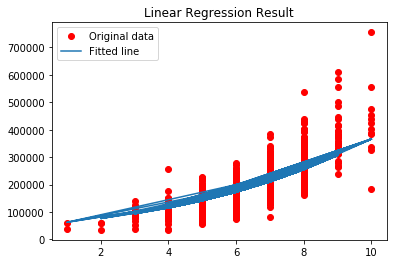

In [238]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x,predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

# Conclusions
